In [2]:
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data as wb
from pandas.util.testing import assert_frame_equal

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from datetime import *
from math import log, sqrt

In [2]:
s1=input('Ticker 1: ')
s2=input('Ticker 2: ')
s3=input('Ticker 3: ')

stocks=s1+'_'+s2+'_'+s3

start = datetime(2016, 12, 31)
end = datetime.now()

s1_data=wb.DataReader(s1,'yahoo',start,end)
s2_data=wb.DataReader(s2,'yahoo',start,end)
s3_data=wb.DataReader(s3,'yahoo',start,end)
stock_data = wb.DataReader([s1, s2, s3], 'yahoo', start, end)
stock_data.to_csv(r'C:\Users\gordo\CODE_BUILDING\Real_Time_Stock_Market_Data\Real_Deal\stock_data_'+stocks+'.csv')

Ticker 1: AMZN
Ticker 2: BKNG
Ticker 3: ZM


In [19]:
stock_data['Adj Close'].head()

Symbols,GOOG,AMZN,BKNG
Date,,,
2017-01-03,786.140015,753.669983,1477.569946
2017-01-04,786.900024,757.179993,1487.290039
2017-01-05,794.020020,780.450012,1503.699951
2017-01-06,806.150024,795.989990,1520.569946
2017-01-09,806.650024,796.919983,1529.640015


In [20]:
stock_data['Adj Close'].tail()

Symbols,GOOG,AMZN,BKNG
Date,,,
2020-01-27,1433.900024,1828.339966,1908.890015
2020-01-28,1452.560059,1853.250000,1917.449951
2020-01-29,1458.630005,1858.000000,1893.949951
2020-01-30,1455.839966,1870.680054,1872.089966
2020-01-31,1434.229980,2008.719971,1830.550049


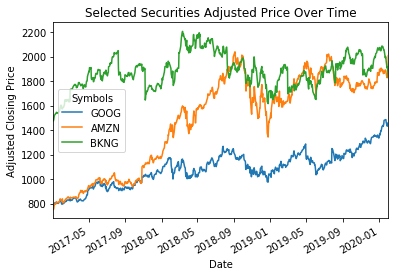

In [21]:
stock_data_closing_prices = stock_data['Adj Close']
stock_data_closing_prices.plot()
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price")
plt.title("Selected Securities Adjusted Price Over Time")
plt.show()

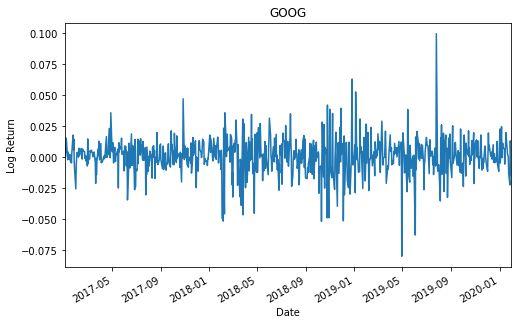

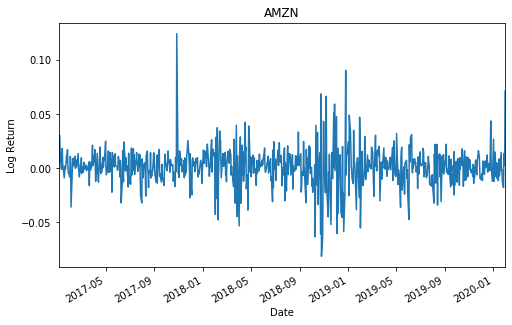

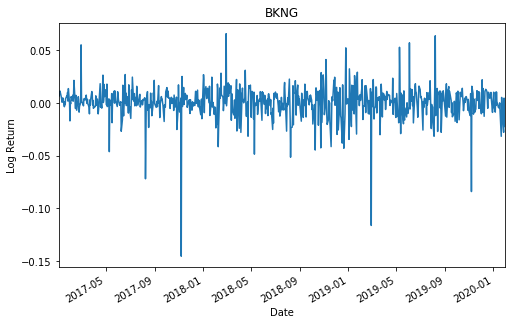

In [22]:
# LOGRITHMIC RETURN

s1_data['log_return']=np.log(s1_data['Adj Close']/s1_data['Adj Close'].shift(1))
s2_data['log_return']=np.log(s2_data['Adj Close']/s2_data['Adj Close'].shift(1))
s3_data['log_return']=np.log(s3_data['Adj Close']/s3_data['Adj Close'].shift(1))

s1_data['log_return'].plot(figsize=(8, 5))
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.title(s1)
plt.show()

s2_data['log_return'].plot(figsize=(8, 5))
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.title(s2)
plt.show()

s3_data['log_return'].plot(figsize=(8, 5))
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.title(s3)
plt.show()

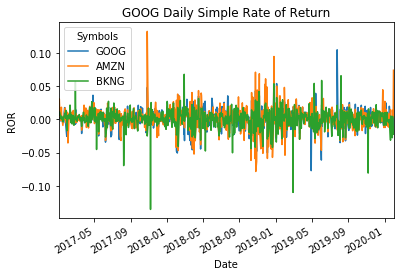

<Figure size 1152x648 with 0 Axes>

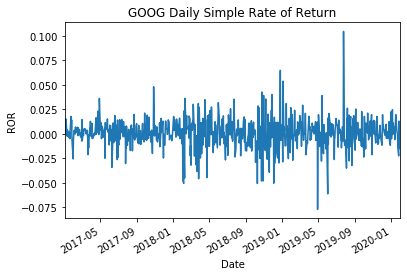

<Figure size 1152x648 with 0 Axes>

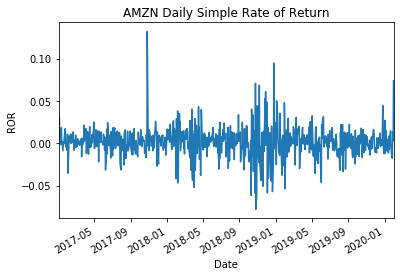

<Figure size 1152x648 with 0 Axes>

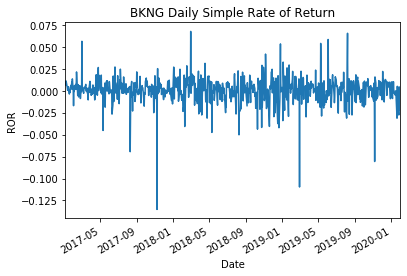

<Figure size 1152x648 with 0 Axes>

In [23]:
#stock_data_daily_returns = stock_data['Adj Close'].pct_change()

stock_data_returns=stock_data['Adj Close'].pct_change()
stock_data_returns.plot()
plt.xlabel("Date")
plt.ylabel("ROR")
plt.title(str(s1)+' Daily Simple Rate of Return')
plt.figure(figsize=(16,9))
plt.show()

s1_daily_returns = s1_data['Adj Close'].pct_change()
s1_daily_returns.plot()
plt.xlabel("Date")
plt.ylabel("ROR")
plt.title(str(s1)+' Daily Simple Rate of Return')
plt.figure(figsize=(16,9))
plt.show()

s2_daily_returns = s2_data['Adj Close'].pct_change()
s2_daily_returns.plot()
plt.xlabel("Date")
plt.ylabel("ROR")
plt.title(str(s2)+' Daily Simple Rate of Return')
plt.figure(figsize=(16,9))
plt.show()

s3_daily_returns = s3_data['Adj Close'].pct_change()
s3_daily_returns.plot()
plt.xlabel("Date")
plt.ylabel("ROR")
plt.title(str(s3)+' Daily Simple Rate of Return')
plt.figure(figsize=(16,9))
plt.show()

Attributes    Adj Close                                  Close               \
Symbols            GOOG         AMZN         BKNG         GOOG         AMZN   
Date                                                                          
2017-01-03   786.140015   753.669983  1477.569946   786.140015   753.669983   
2017-01-04   786.900024   757.179993  1487.290039   786.900024   757.179993   
2017-01-05   794.020020   780.450012  1503.699951   794.020020   780.450012   
2017-01-06   806.150024   795.989990  1520.569946   806.150024   795.989990   
2017-01-09   806.650024   796.919983  1529.640015   806.650024   796.919983   
...                 ...          ...          ...          ...          ...   
2020-01-27  1433.900024  1828.339966  1908.890015  1433.900024  1828.339966   
2020-01-28  1452.560059  1853.250000  1917.449951  1452.560059  1853.250000   
2020-01-29  1458.630005  1858.000000  1893.949951  1458.630005  1858.000000   
2020-01-30  1455.839966  1870.680054  1872.089966  1

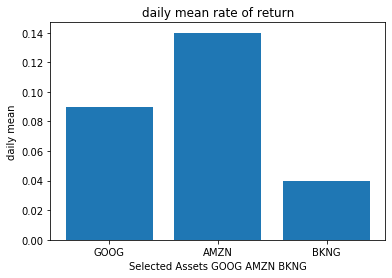

In [24]:
# daily mean rate of return

# calculate daily mean

stock_data_mean=round(stock_data_returns.mean(),4)*100
print(str(stock_data)+' daily mean return is: '+str(stock_data_mean)+'%')


s1_daily_mean=round(s1_daily_returns.mean(),4)*100
print(str(s1)+' daily mean return is: '+str(s1_daily_mean)+'%')

s2_daily_mean=round(s2_daily_returns.mean(),4)*100
print(str(s2)+' daily mean return is: '+str(s2_daily_mean)+'%')

s3_daily_mean=round(s3_daily_returns.mean(),4)*100
print(str(s3)+' daily mean return is: '+str(s3_daily_mean)+'%')



# daily mean index for the x axis
stock_data_mean.keys()

# grab each daily mean value for the y axis
height = []
for key in stock_data_mean.keys():
    height.append(stock_data_mean[key])
height

# arrange keys on x axis based on length
x_pos = np.arange(len(stock_data_mean.keys()))
x_pos

# plot bars
plt.bar(x_pos, height)
 
# create names on the x-axis
plt.xticks(x_pos, stock_data_mean.keys())

# label chart
plt.xlabel('Selected Assets '+str(s1)+' '+str(s2)+' '+str(s3))
plt.ylabel("daily mean")
plt.title("daily mean rate of return")

# show graphic
plt.show()

In [25]:
# calculate variance
daily_var = round(stock_data_returns.var(),5)*100
daily_var

Symbols
GOOG    0.021
AMZN    0.030
BKNG    0.023
dtype: float64

Index(['GOOG', 'AMZN', 'BKNG'], dtype='object', name='Symbols')
[0.021, 0.03, 0.023]
[0 1 2]


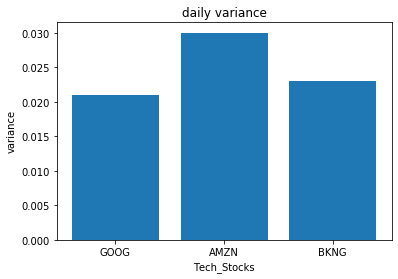

In [26]:
# variance index for the x axis
daily_var.keys()
print(daily_var.keys())

# grab each variance value for the y axis
height = []
for key in daily_var.keys():
    height.append(daily_var[key])
height
print(height)

# arrange keys on x axis based on length
x_pos = np.arange(len(daily_var.keys()))
x_pos
print(x_pos)

# plot bars
plt.bar(x_pos, height)
 
# create names on the x-axis
plt.xticks(x_pos, daily_var.keys())

# label chart
plt.xlabel("Tech_Stocks")
plt.ylabel("variance")
plt.title("daily variance")

# show graphic
plt.show()

In [27]:
# calculate standard deviation
daily_std = stock_data_returns.std()
daily_std


Symbols
GOOG    0.014527
AMZN    0.017363
BKNG    0.015023
dtype: float64

Index(['GOOG', 'AMZN', 'BKNG'], dtype='object', name='Symbols')
[0.014526703409641996, 0.017363304762330296, 0.015022504310732822]
[0 1 2]


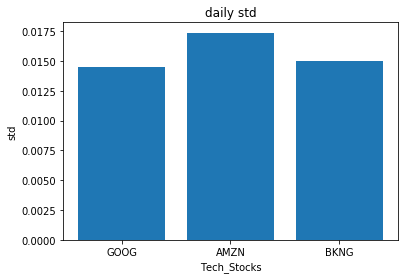

In [28]:
# standard deviation index for the x axis
daily_var.keys()
print(daily_var.keys())

# grab each standard deviation value for the y axis
height = []
for key in daily_std.keys():
    height.append(daily_std[key])
height
print(height)

# arrange keys on x axis based on length
x_pos = np.arange(len(daily_std.keys()))
x_pos
print(x_pos)

# plot bars
plt.bar(x_pos, height)
 
# create names on the x-axis
plt.xticks(x_pos, daily_std.keys())

# label chart
plt.xlabel("Tech_Stocks")
plt.ylabel("std")
plt.title("daily std")

# show graphic
plt.show()

In [29]:
stock_data_returns.corr()

Symbols,GOOG,AMZN,BKNG
Symbols,,,
GOOG,1.000000,0.672619,0.445436
AMZN,0.672619,1.000000,0.424982
BKNG,0.445436,0.424982,1.000000


In [30]:
#df=pd.read_csv(r'C:\Users\gordo\CODE_BUILDING\Real_Time_Stock_Market_Data\Real_Deal\stock_data_'+stocks+'.csv')
stock_data['Adj Close'].head()
#stock_data.to_csv(r'C:\Users\gordo\CODE_BUILDING\Real_Time_Stock_Market_Data\Real_Deal\stock_data_'+stocks+'.csv',index=False)

Symbols,GOOG,AMZN,BKNG
Date,,,
2017-01-03,786.140015,753.669983,1477.569946
2017-01-04,786.900024,757.179993,1487.290039
2017-01-05,794.020020,780.450012,1503.699951
2017-01-06,806.150024,795.989990,1520.569946
2017-01-09,806.650024,796.919983,1529.640015


In [ ]:
stock_data['Adj Close'].head()

In [ ]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])